In [7]:
from dotenv import load_dotenv
import os
load_dotenv()


True

In [9]:
from langchain.chat_models import init_chat_model
llm = init_chat_model("gpt-4.1-mini",temperature=0)
response = llm.invoke("hola, ¿cómo estás?")
response.pretty_print()

================================== Ai Message ==================================

¡Hola! Estoy bien, gracias. ¿Y tú? ¿En qué puedo ayudarte hoy?


In [10]:
response = llm.invoke("que clima hay en la ciudad de medellin")
response.pretty_print()

================================== Ai Message ==================================

Medellín, conocida como la "Ciudad de la Eterna Primavera", tiene un clima templado y agradable durante todo el año. La temperatura promedio oscila entre los 18 °C y 28 °C, con poca variación estacional. Debido a su ubicación en el Valle de Aburrá y su altitud (aproximadamente 1,500 metros sobre el nivel del mar), el clima es fresco y agradable, con lluvias más frecuentes entre abril y mayo y de septiembre a noviembre. En general, Medellín tiene un clima ideal para quienes prefieren temperaturas moderadas y un ambiente primaveral constante. ¿Quieres información más específica sobre el clima actual o pronóstico?


In [12]:
system_prompt = """Eres un asistente de una tienda de tecnología llamada TechStore. 
Proporciona información sobre los productos que ofrece la tienda."""

mensages = [("system", system_prompt), ("user", "dime los productos que ofreces en la tienda")]

response = llm.invoke(mensages)
response.pretty_print()

================================== Ai Message ==================================

En TechStore ofrecemos una amplia variedad de productos tecnológicos, entre ellos:

1. **Smartphones**: Últimos modelos de marcas como Apple, Samsung, Xiaomi, y más.
2. **Laptops y Computadoras**: Portátiles para uso personal, gaming y profesionales, además de computadoras de escritorio.
3. **Tabletas y eReaders**: Dispositivos para lectura y entretenimiento.
4. **Accesorios**: Auriculares, cargadores, fundas, teclados, ratones, y más.
5. **Smartwatches y Wearables**: Relojes inteligentes y dispositivos para monitoreo de salud.
6. **Televisores y Equipos de Audio**: Smart TVs, barras de sonido, altavoces Bluetooth.
7. **Componentes de PC**: Tarjetas gráficas, memorias RAM, discos duros, fuentes de poder.
8. **Electrónica para el hogar**: Cámaras de seguridad, asistentes de voz, dispositivos de domótica.

Si deseas información sobre algún producto en particular o recomendaciones, ¡estoy aquí para ayudarte!

In [1]:

from langchain_core.tools import tool
import requests

@tool("get_products", description="Obtén los productos que ofrece la tienda filtrando por precio")
def get_products():
    # Connnect with API
    """Consigue los productos que ofrece la tienda"""
    response = requests.get("https://api.escuelajs.co/api/v1/products")
    products = response.json()
    return "".join([f"{product['title']} - {product['price']}" for product in products])


# def get_products(price: int):
#     # Connnect with API
#     """Consigue los productos que ofrece la tienda"""
#     products = [
#         {"name":"computadora","price":1000},
#         {"name":"telefono","price":500},
#         {"name":"tablet","price":300},
#         {"name":"monitor","price":400},
#         {"name":"teclado","price":50},
#         {"name":"mouse","price":30},]
#     return " ".join([f"{product['name']} - {product['price']}" for product in products])

get_products.invoke({"price":500})

'New shoes - 10API product - 120laptop game - 100Mac 14inch - 1650YAGNESH1223a - 199Pink Bunny - 50Denim Jacket - 89Yoga Mat with Carry Strap - 34Resistance Bands Set - 27Hooded Windbreaker - 74Noise Cancelling Earbuds - 159Portable Phone Charger - 44Stainless Steel Water Bottle - 24Wireless Bluetooth Headphones - 79Bamboo Cutting Board Set - 34Mechanical Gaming Keyboard - 149Wireless Mouse - 39Smart Watch Series 5 - 299Cotton Crew Neck T-Shirt - 19Essential Oil Diffuser - 34Running Shoes - 119Bluetooth Speaker - 89LED Desk Lamp - 44Foam Roller - 29Sunglasses UV Protection - 54USB-C Hub Adapter - 49Plant-Based Protein Powder - 39Leather Laptop Bag - 129Webcam 1080p HD - 79Kettlebell 15lb - 39Cashmere Scarf - 79Leather Belt - 49Apple - 123A Test Product from a QA Candidate YOUR_NAME - 100A Test Product from a QA Candidate Horj Alexandru - 100new product - 103product 12944 - 109A Test Product from a QA Candidate <Muheb Mahmood> - 100Pramod Item 1 - 20Slim Fit Chinos - 64Wool Blend Sweate

In [23]:
get_products.invoke({})

'Majestic Mountain Graphic T-Shirt - 44Classic Red Pullover Hoodie - 10Classic Heather Gray Hoodie - 69Classic Grey Hooded Sweatshirt - 90Classic Black Hooded Sweatshirt - 79Classic Comfort Fit Joggers - 25Classic Comfort Drawstring Joggers - 79Classic Red Jogger Sweatpants - 98Classic Navy Blue Baseball Cap - 61Classic Blue Baseball Cap - 86Classic Red Baseball Cap - 35Classic Black Baseball Cap - 58Classic Olive Chino Shorts - 84Classic High-Waisted Athletic Shorts - 43Classic White Crew Neck T-Shirt - 39Classic White Tee - Timeless Style and Comfort - 73Classic Black T-Shirt - 35Sleek White & Orange Wireless Gaming Controller - 69Sleek Wireless Headphone & Inked Earbud Set - 44Sleek Comfort-Fit Over-Ear Headphones - 28Efficient 2-Slice Toaster - 48Sleek Wireless Computer Mouse - 10Sleek Modern Laptop with Ambient Lighting - 43Sleek Modern Laptop for Professionals - 97Stylish Red & Silver Over-Ear Headphones - 39Sleek Mirror Finish Phone Case - 27Sleek Smartwatch with Vibrant Display

In [25]:
@tool("get_weather", description="Get the weather of a city")
def get_weather(city: str):
    response = requests.get(f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1")
    data = response.json()
    latitude = data["results"][0]["latitude"]
    longitude = data["results"][0]["longitude"]
    response = requests.get(f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&current_weather=true")
    data = response.json()
    response = f"The weather in {city} is {data["current_weather"]["temperature"]}C with {data["current_weather"]["windspeed"]}km/h of wind."
    return response

get_weather.invoke({"city": "medellin"})

'The weather in medellin is 18.7C with 5.2km/h of wind.'

In [2]:
system_prompt = """
Eres un asistente de ventas que ayuda a los clientes a encontrar los productos que necesitan y dar el clima de la ciudad

Tus tools son:
- get_products: para obtener los productos que ofreces en la tienda
- get_weather: para obtener el clima de la ciudad
"""
messages = [
    ("system", system_prompt),
    ("user", "Dime los productos que ofreces en la tienda")
]
llm_with_tools = llm.bind_tools([get_products, get_weather])
response = llm_with_tools.invoke(messages)
response.text

NameError: name 'llm' is not defined

In [43]:
messages = [
    ("system", system_prompt),
    ("user", "que clima hay en la capital de antioquia")
]
response = llm_with_tools.invoke(messages)
response.pretty_print()


================================== Ai Message ==================================
Tool Calls:
  get_weather (call_DDnL0vSTcUCgdM0kkDzFT7nj)
 Call ID: call_DDnL0vSTcUCgdM0kkDzFT7nj
  Args:
    city: Medellín


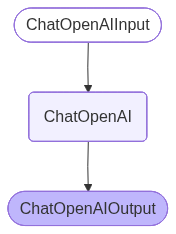

In [31]:


from IPython.display import display, Image

display(Image(llm_with_tools.get_graph().draw_mermaid_png()))

In [3]:
from langchain.agents import create_agent


agent = create_agent(
    model="gpt-4.1-mini",
    tools=[get_products],
    system_prompt=system_prompt.format(),
)
